# Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import tools
import plotly.express as px
import plotly.graph_objects as go

# Loading Dataset

* In this task we need to predict the future prices of the house in this dependent variable is continuous. So, here we use linear regression Model.

In [2]:
# Loading The Dataset
db=pd.read_excel("DS - Assignment Part 1 data set.xlsx")
db

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1
...,...,...,...,...,...,...,...,...,...
409,2013.000000,13.7,4082.01500,0,24.94155,121.50381,3,803,15.4
410,2012.666667,5.6,90.45606,9,24.97433,121.54310,2,1278,50.0
411,2013.250000,18.8,390.96960,7,24.97923,121.53986,1,503,40.6
412,2013.000000,8.1,104.81010,5,24.96674,121.54067,1,597,52.5


In [3]:
db.shape

(414, 9)

In [4]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Transaction date                          414 non-null    float64
 1   House Age                                 414 non-null    float64
 2   Distance from nearest Metro station (km)  414 non-null    float64
 3   Number of convenience stores              414 non-null    int64  
 4   latitude                                  414 non-null    float64
 5   longitude                                 414 non-null    float64
 6   Number of bedrooms                        414 non-null    int64  
 7   House size (sqft)                         414 non-null    int64  
 8   House price of unit area                  414 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 29.2 KB


In [5]:
db.describe()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,1.987923,931.475845,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,0.818875,348.910269,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,1.000000,402.000000,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,1.000000,548.000000,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,2.000000,975.000000,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,3.000000,1234.750000,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,3.000000,1500.000000,117.500000


# Exploratory Data Analysis

##  Checking missing values

In [6]:
db.isnull().sum()

Transaction date                            0
House Age                                   0
Distance from nearest Metro station (km)    0
Number of convenience stores                0
latitude                                    0
longitude                                   0
Number of bedrooms                          0
House size (sqft)                           0
House price of unit area                    0
dtype: int64

* Here there is no missing values in the data

## Checking Outliers

<AxesSubplot:>

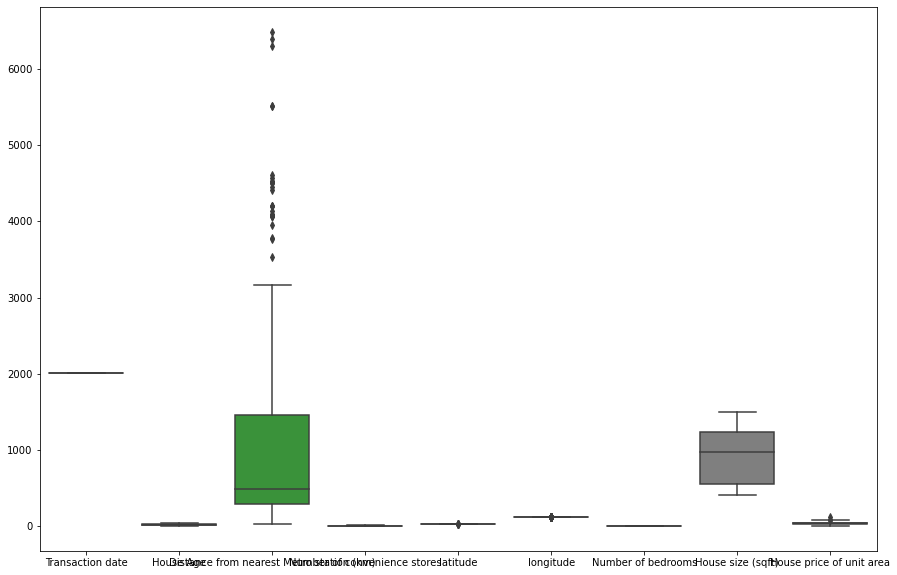

In [53]:
# Using the boxplot to check outliers
plt.figure(figsize=(15,10))
sns.boxplot(data=db)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Distance from nearest Metro station (km)'>

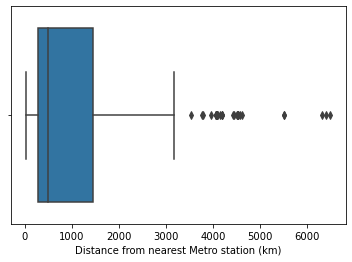

In [8]:
sns.boxplot(db["Distance from nearest Metro station (km)"])

In [9]:
a=db["Distance from nearest Metro station (km)"].quantile(0.80)
a

1783.18

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Distance from nearest Metro station (km)'>

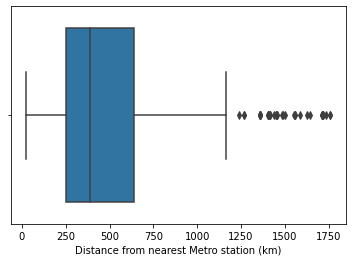

In [10]:
dbo=db[db["Distance from nearest Metro station (km)"]<a]
sns.boxplot(dbo["Distance from nearest Metro station (km)"])

* While removing of bigger value or outlier we use quantile 0.80. but we loss the *20%* of the data so that we don't apply quantile here.

# Segregation of Objective And Numaric Columns

In [11]:
obj=[]
num=[]
for col in db.columns:
    if db[col].dtype=="O":
        obj.append(col)
    else:
        num.append(col)


In [12]:
obj

[]

In [13]:
num

['Transaction date',
 'House Age',
 'Distance from nearest Metro station (km)',
 'Number of convenience stores',
 'latitude',
 'longitude',
 'Number of bedrooms',
 'House size (sqft)',
 'House price of unit area']

## Creating pairplot to finding the correlation between the variables

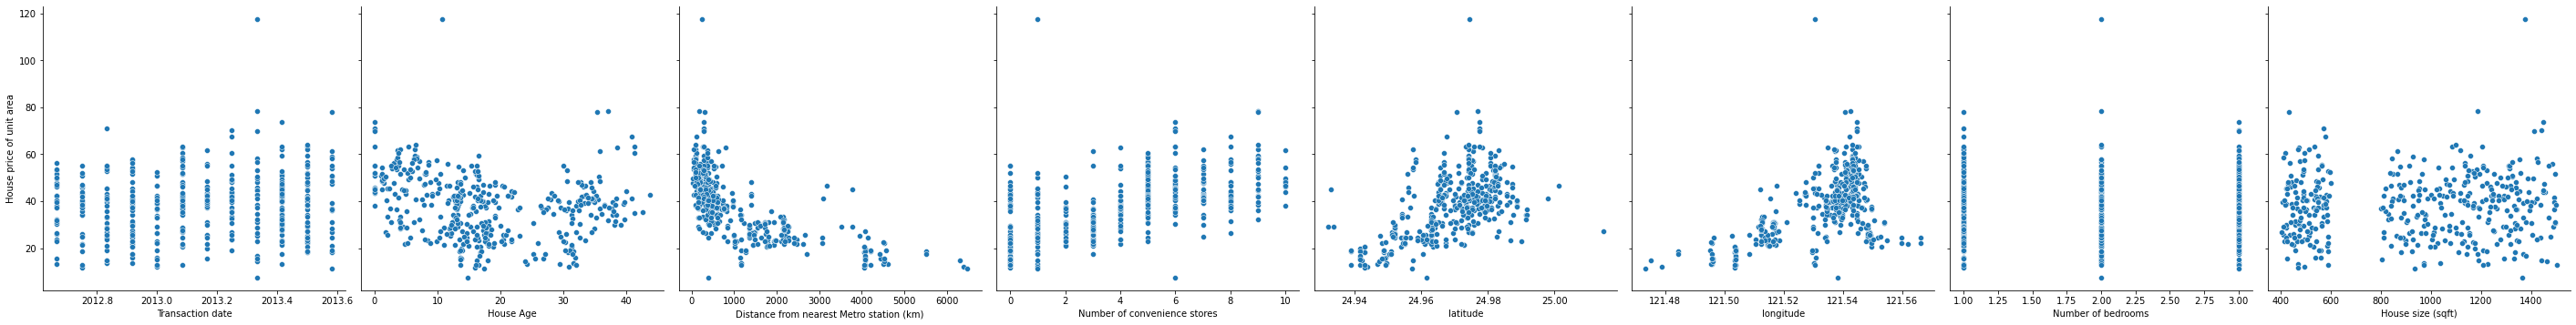

In [14]:
sns.pairplot(db,x_vars=['Transaction date','House Age','Distance from nearest Metro station (km)','Number of convenience stores','latitude','longitude','Number of bedrooms','House size (sqft)'],y_vars='House price of unit area',height=5)

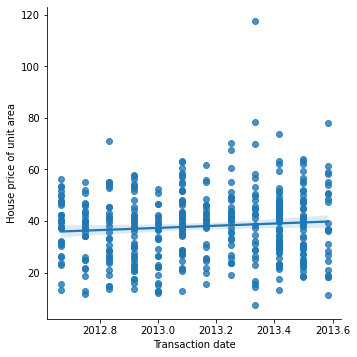

In [54]:
sns.pairplot(db,x_vars=['Transaction date',],y_vars='House price of unit area',height=5,kind='reg')

* There is no correlation between Transaction date and House price of unit area variablrs

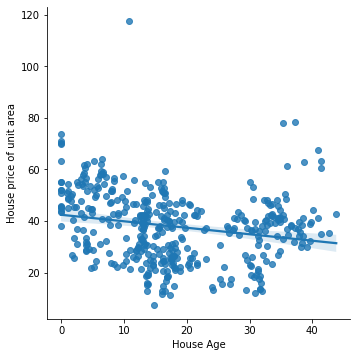

In [55]:
sns.pairplot(db,x_vars=['House Age',],y_vars='House price of unit area',height=5,kind='reg')

* Here Negative correlation between the House age and House price of unit area variablrs. When ever the age of the house increses the price of the house slightly decreases respectively.

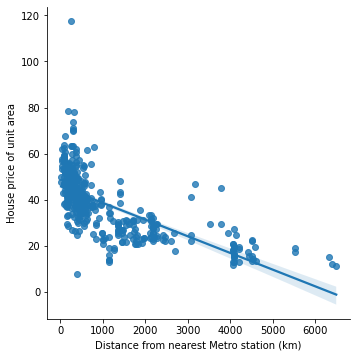

In [56]:
sns.pairplot(db,x_vars=[
 'Distance from nearest Metro station (km)'],y_vars='House price of unit area',height=5,kind='reg')

* Here Negative correlation between the istance from nearest Metro station (km) and House price of unit area variablrs. When ever the istance from nearest Metro station (km) increses the price of the house decreases respectively.

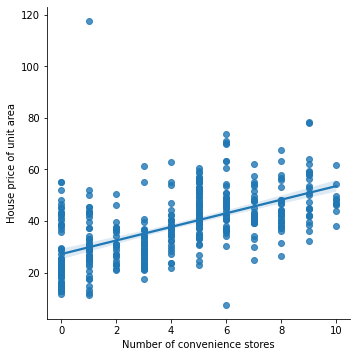

In [57]:
sns.pairplot(db,x_vars=['Number of convenience stores',],y_vars='House price of unit area',height=5,kind='reg')

* There is a correlation between Number of convenience stores and House price of unit area variablrs. when ever the Number of convenience stores are increased the price of the house also increased respectively.

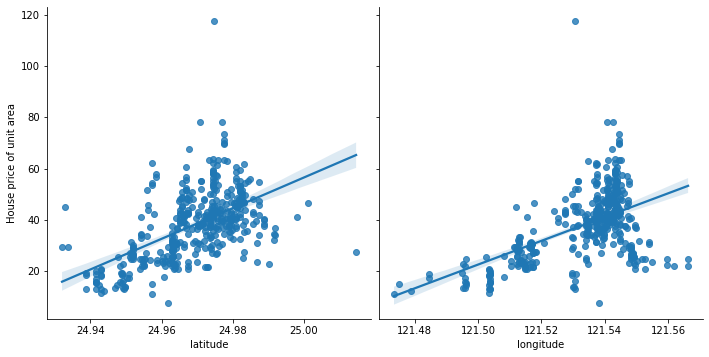

In [58]:
sns.pairplot(db,x_vars=['latitude','longitude',],y_vars='House price of unit area',height=5,kind='reg')

* There is no correlation between Transaction date and House price of unit area variablrs

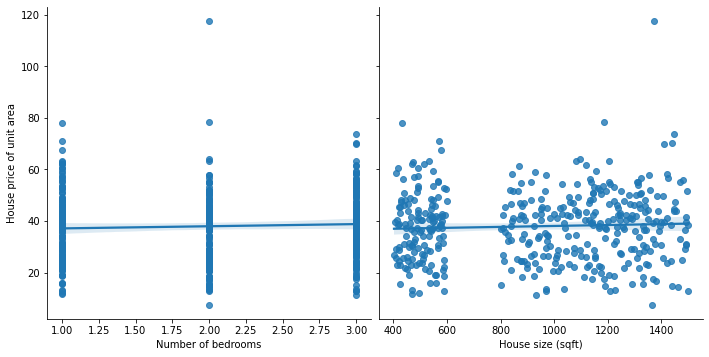

In [59]:
sns.pairplot(db,x_vars=['Number of bedrooms','House size (sqft)'],y_vars='House price of unit area',height=5,kind='reg')

* There is small correlation between number of bedrooms,house size and House price of unit area variablrs

In [21]:
db.corr()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
Transaction date,1.000000,0.017542,0.060880,0.009544,0.035016,-0.041065,0.061985,0.068405,0.087529
House Age,0.017542,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.008756,-0.060361,-0.210567
Distance from nearest Metro station (km),0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.046856,0.001795,-0.673613
Number of convenience stores,0.009544,0.049593,-0.602519,1.000000,0.444143,0.449099,0.043638,0.033286,0.571005
latitude,0.035016,0.054420,-0.591067,0.444143,1.000000,0.412924,0.043921,0.031696,0.546307
longitude,-0.041065,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.041680,0.009322,0.523287
Number of bedrooms,0.061985,-0.008756,-0.046856,0.043638,0.043921,0.041680,1.000000,0.752276,0.050265
House size (sqft),0.068405,-0.060361,0.001795,0.033286,0.031696,0.009322,0.752276,1.000000,0.046489
House price of unit area,0.087529,-0.210567,-0.673613,0.571005,0.546307,0.523287,0.050265,0.046489,1.000000


### Heat map 

<AxesSubplot:>

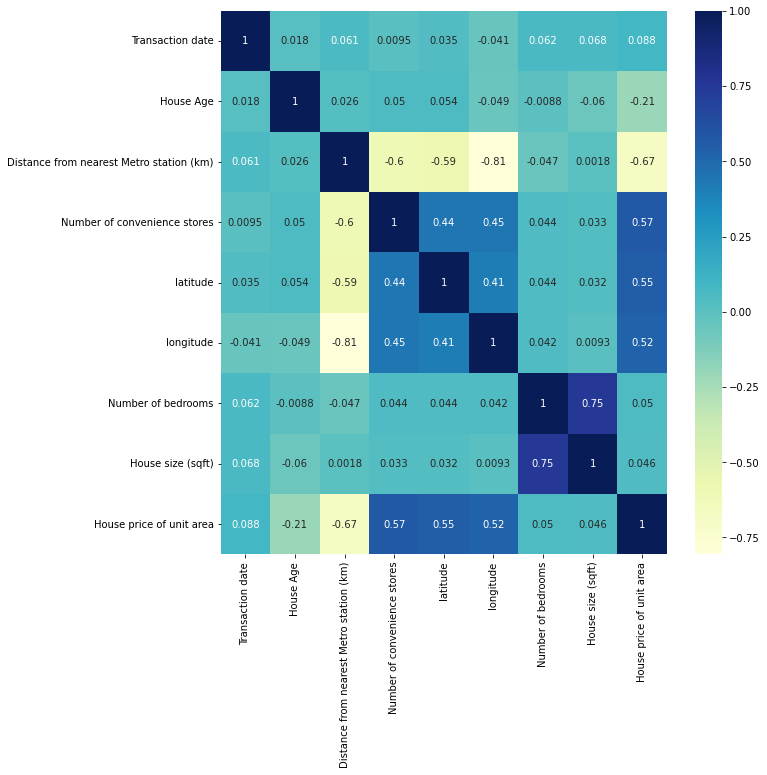

In [22]:
plt.figure(figsize=(10,10))
sns.heatmap(db.corr(),cmap="YlGnBu",annot=True)

* Heat map represents the Number of convenience stores variable have high correlation value is 0.57.
* latitude,longitude variables have correlation values 0.55,0.52 respectively.

## multicollinearity to find VIF- (variance_inflation_factor)

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
q=db[['Transaction date','House Age','Distance from nearest Metro station (km)','Number of convenience stores','latitude','longitude','Number of bedrooms','House size (sqft)']]
vif=pd.DataFrame()
vif['features']=q.columns
vif['VIF']=[variance_inflation_factor(q.values,i) for i in range(len(q.columns))]
print(vif)

                                   features           VIF
0                          Transaction date  4.264162e+07
1                                 House Age  3.500035e+00
2  Distance from nearest Metro station (km)  4.287569e+00
3              Number of convenience stores  4.758596e+00
4                                  latitude  6.184837e+06
5                                 longitude  4.212056e+07
6                        Number of bedrooms  1.607817e+01
7                         House size (sqft)  1.902631e+01


# Fitting the model

### Splitting the Dataset

In [60]:
# Splitting the dataset into x-independent variable and y-dependent variable.
x=db.drop("House price of unit area",axis=1)
y=db["House price of unit area"]

In [25]:
# x is a independent variable
x

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft)
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491
...,...,...,...,...,...,...,...,...
409,2013.000000,13.7,4082.01500,0,24.94155,121.50381,3,803
410,2012.666667,5.6,90.45606,9,24.97433,121.54310,2,1278
411,2013.250000,18.8,390.96960,7,24.97923,121.53986,1,503
412,2013.000000,8.1,104.81010,5,24.96674,121.54067,1,597


In [26]:
# y is a depenent or target variable
y

0      37.9
1      42.2
2      47.3
3      54.8
4      43.1
       ... 
409    15.4
410    50.0
411    40.6
412    52.5
413    63.9
Name: House price of unit area, Length: 414, dtype: float64

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(x,y)

In [28]:
x_train

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft)
205,2013.083333,12.8,1449.7220,3,24.97289,121.51728,2,945
411,2013.250000,18.8,390.9696,7,24.97923,121.53986,1,503
61,2013.500000,5.3,259.6607,6,24.97585,121.54516,3,1083
357,2013.416667,0.0,338.9679,9,24.96853,121.54413,3,1319
18,2013.416667,16.9,368.1363,8,24.96750,121.54451,3,1291
...,...,...,...,...,...,...,...,...
295,2013.166667,18.2,2179.5900,3,24.96299,121.51252,3,899
216,2013.250000,37.8,590.9292,1,24.97153,121.53559,3,1140
236,2013.166667,3.6,373.8389,10,24.98322,121.53765,3,1117
187,2013.000000,8.9,3078.1760,0,24.95464,121.56627,3,1175


In [29]:
y_train

205    21.4
411    40.6
61     63.2
357    44.9
18     42.3
       ... 
295    21.8
216    39.7
236    61.9
187    22.0
319    26.9
Name: House price of unit area, Length: 310, dtype: float64

In [30]:
x_test

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft)
113,2013.333333,14.8,393.2606,6,24.96172,121.53812,2,1365
279,2013.416667,2.6,1554.2500,3,24.97026,121.51642,1,440
407,2013.000000,5.2,2408.9930,0,24.95505,121.55964,1,587
111,2013.583333,33.3,196.6172,7,24.97701,121.54224,2,1136
278,2012.750000,0.0,208.3905,6,24.95618,121.53844,2,1448
...,...,...,...,...,...,...,...,...
93,2012.916667,31.9,1146.3290,0,24.94920,121.53076,1,536
89,2013.500000,23.0,3947.9450,0,24.94783,121.50243,1,471
396,2012.666667,37.1,918.6357,1,24.97198,121.55063,2,907
310,2013.583333,16.4,1643.4990,2,24.95394,121.55174,3,886


In [31]:
y_test

113     7.6
279    31.1
407    22.3
111    39.4
278    44.0
       ... 
93     16.1
89     25.3
396    31.9
310    24.7
92     21.8
Name: House price of unit area, Length: 104, dtype: float64

## model building and fit  linear regression Model

In [32]:
import statsmodels.api as sm

In [33]:
sm

<module 'statsmodels.api' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\statsmodels\\api.py'>

In [61]:
# Adding constant to the our training dataset because we have coefficient for the constant
cons=sm.add_constant(x_train)
cons

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



,const,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft)
205,1.0,2013.083333,12.8,1449.7220,3,24.97289,121.51728,2,945
411,1.0,2013.250000,18.8,390.9696,7,24.97923,121.53986,1,503
61,1.0,2013.500000,5.3,259.6607,6,24.97585,121.54516,3,1083
357,1.0,2013.416667,0.0,338.9679,9,24.96853,121.54413,3,1319
18,1.0,2013.416667,16.9,368.1363,8,24.96750,121.54451,3,1291
...,...,...,...,...,...,...,...,...,...
295,1.0,2013.166667,18.2,2179.5900,3,24.96299,121.51252,3,899
216,1.0,2013.250000,37.8,590.9292,1,24.97153,121.53559,3,1140
236,1.0,2013.166667,3.6,373.8389,10,24.98322,121.53765,3,1117
187,1.0,2013.000000,8.9,3078.1760,0,24.95464,121.56627,3,1175


In [62]:
# Applyong Ordinary least square method 
olmd=sm.OLS(y_train,cons).fit()
olmd

In [36]:
olmd.params

const                                      -16957.665789
Transaction date                                4.955309
House Age                                      -0.225744
Distance from nearest Metro station (km)       -0.004157
Number of convenience stores                    1.223156
latitude                                      200.887221
longitude                                      16.519475
Number of bedrooms                              0.309910
House size (sqft)                              -0.000611
dtype: float64

In [37]:
print(olmd.summary())

                               OLS Regression Results                               
Dep. Variable:     House price of unit area   R-squared:                       0.605
Model:                                  OLS   Adj. R-squared:                  0.594
Method:                       Least Squares   F-statistic:                     57.60
Date:                      Thu, 01 Dec 2022   Prob (F-statistic):           2.71e-56
Time:                              11:20:25   Log-Likelihood:                -1087.3
No. Observations:                       310   AIC:                             2193.
Df Residuals:                           301   BIC:                             2226.
Df Model:                                 8                                         
Covariance Type:                  nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

## check model over fitted or under fitted test data

In [38]:
test_p=sm.add_constant(x_test)
test_p

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



,const,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft)
113,1.0,2013.333333,14.8,393.2606,6,24.96172,121.53812,2,1365
279,1.0,2013.416667,2.6,1554.2500,3,24.97026,121.51642,1,440
407,1.0,2013.000000,5.2,2408.9930,0,24.95505,121.55964,1,587
111,1.0,2013.583333,33.3,196.6172,7,24.97701,121.54224,2,1136
278,1.0,2012.750000,0.0,208.3905,6,24.95618,121.53844,2,1448
...,...,...,...,...,...,...,...,...,...
93,1.0,2012.916667,31.9,1146.3290,0,24.94920,121.53076,1,536
89,1.0,2013.500000,23.0,3947.9450,0,24.94783,121.50243,1,471
396,1.0,2012.666667,37.1,918.6357,1,24.97198,121.55063,2,907
310,1.0,2013.583333,16.4,1643.4990,2,24.95394,121.55174,3,886


In [39]:
pred=olmd.predict(test_p)
pred

113    43.409383
279    39.692997
407    27.387420
111    45.792068
278    43.469959
         ...    
93     24.574862
89     17.124839
396    29.319562
310    33.461811
92     28.711926
Length: 104, dtype: float64

* Prediction values of House price of unit area by using Linear regression model with Ordinary least square method.

In [40]:
y_test

113     7.6
279    31.1
407    22.3
111    39.4
278    44.0
       ... 
93     16.1
89     25.3
396    31.9
310    24.7
92     21.8
Name: House price of unit area, Length: 104, dtype: float64

##  Looking RMSE-return the mean square error

In [41]:
from sklearn.metrics import mean_squared_error,r2_score

In [42]:
np.sqrt(mean_squared_error(y_test,pred))

10.728681999526344

In [43]:
r_sq=r2_score(y_test,pred)
r_sq

0.506250266018677

## Conclusion

* *The R2 value of train data is 0.580*
* *The R2 value of test data is 0.567*
* Usually, the larger the R2, the better the regression model fits our observations. but here r2 value was have very less, we conclude that this model is Over Fitted and not preferred to further.

* Number of convenience stores,Number of bedrooms & House size (sqft) This are the independent variables are impacting the price of the houses respectively.